In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/Final_Projects/fraud detection/Default.csv')

In [3]:
data

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50
...,...,...,...,...
9995,No,No,711.56,52992.38
9996,No,No,757.96,19660.72
9997,No,No,845.41,58636.16
9998,No,No,1569.01,36669.11


In [4]:
df = data.copy()

In [5]:
df.shape

(10000, 4)

In [6]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


<Axes: ylabel='balance'>

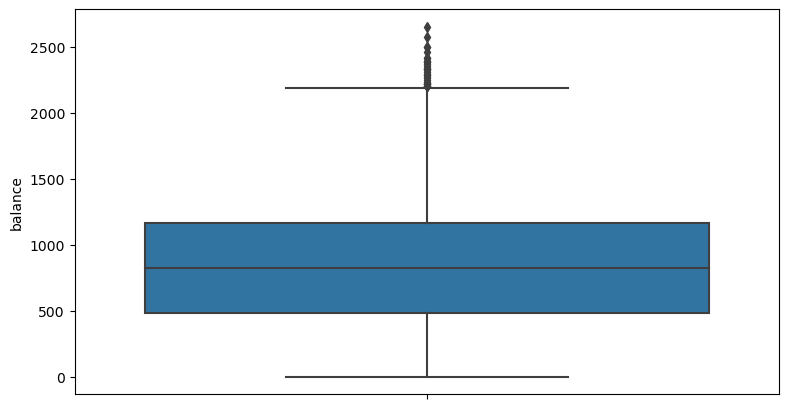

In [7]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.boxplot(y =df['balance'])

<Axes: ylabel='income'>

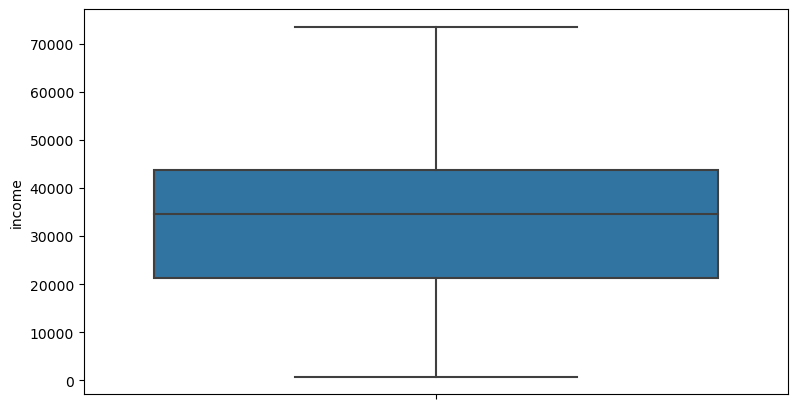

In [8]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.boxplot(y =df['income'])

<Axes: xlabel='count', ylabel='student'>

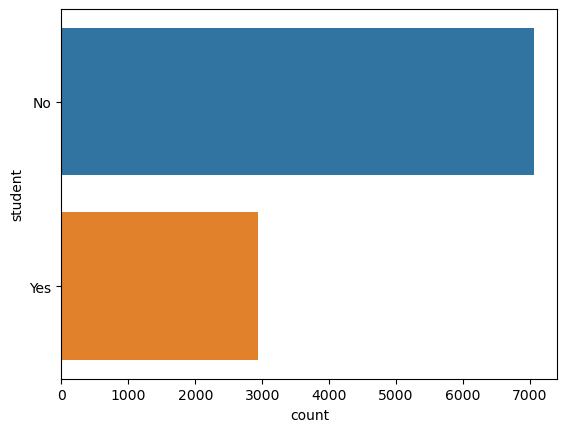

In [9]:
sns.countplot(y =df['student'])

<Axes: xlabel='count', ylabel='default'>

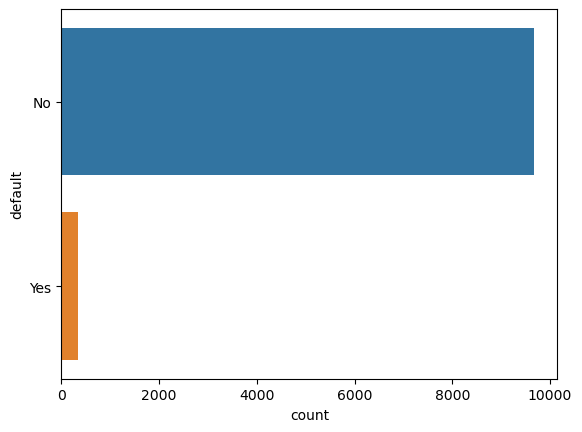

In [10]:
sns.countplot(y =df['default'])

In [11]:
# checking null values

df.isnull().sum()/len(df) * 100

default    0.0
student    0.0
balance    0.0
income     0.0
dtype: float64

In [12]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

No     9667
Yes     333
Name: default, dtype: int64


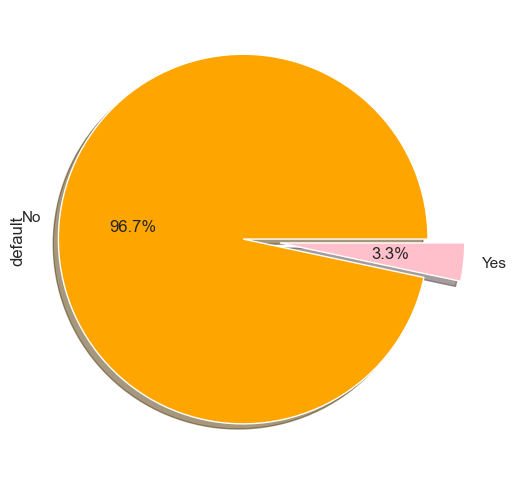

In [13]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
df['default'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['Orange','pink'])
print(df['default'].value_counts())

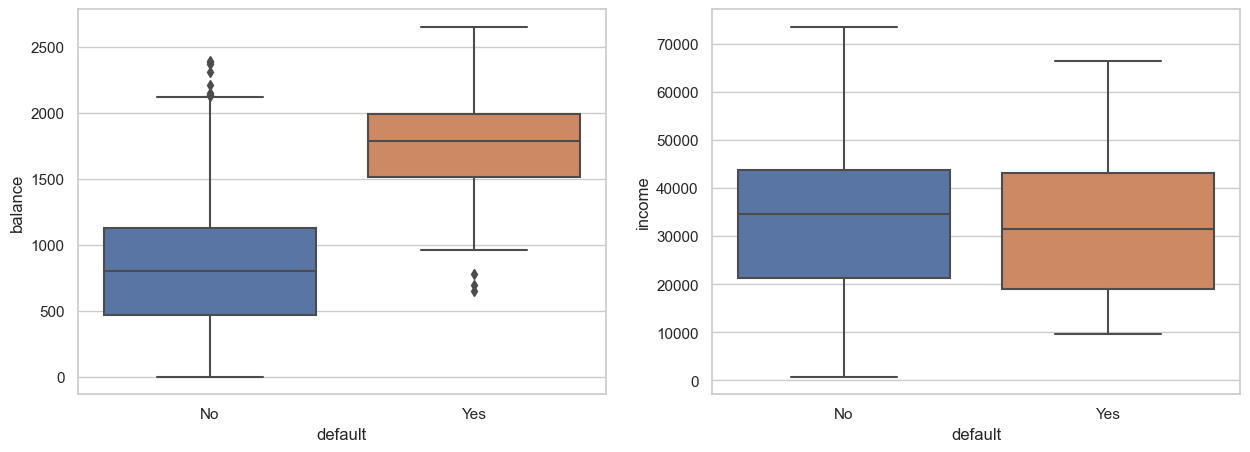

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='default', y='balance', data=df)

plt.subplot(1, 2, 2)
sns.boxplot(x='default', y='income', data=df)

plt.show()

- inference : Defaulters seems to have higher outstanding balance compared non-defaulter. Defaulters income seems lower compared to non-defaulter

<Axes: >

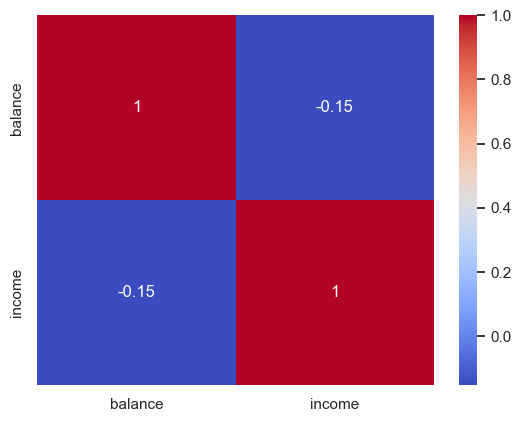

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [16]:
Q1, Q3 = df['balance'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [17]:
df1 = df[df['balance'] > UL]

In [18]:
df2 = df[df['balance'] < LL]
df2

,default,student,balance,income


In [19]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'])

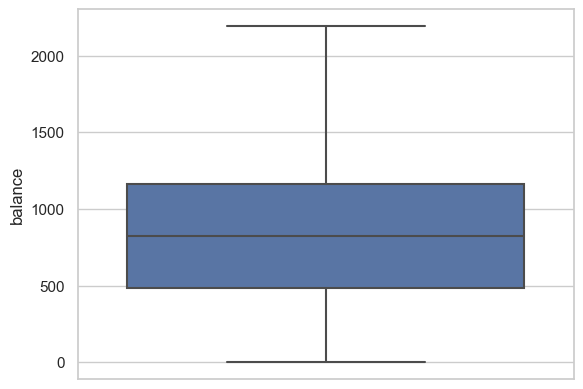

In [20]:
sns.boxplot(y= df['balance'])
plt.show()

In [21]:
df['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

- outliers removed

In [22]:
# from sklearn import LabelEncoder

df = pd.get_dummies(df, drop_first=True)

In [23]:
df.head(7)

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
5,919.59,7491.56,0,1
6,825.51,24905.23,0,0


In [24]:
df.columns = ['balance', 'income', 'default', 'student']

In [25]:
df

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


In [26]:
X = df.drop('default', axis=1)
y = df['default']

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: uint8

In [28]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

- statify = y as this data is highly imbalanced and could possibly result into different proportions in the y variables between train and test set

In [29]:
smote = SMOTE(random_state=42, sampling_strategy=0.75)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [31]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

In [32]:
#model training and prediction

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s Accuracy: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # Calculating training accuracy
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy for {name}: {train_accuracy}")
    print()

    # Calculating test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {name}: {test_accuracy}")

    # Calculating additional metrics
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")
    print()
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print()
    print(f"Recall for {name}: {recall_score(y_test, y_pred)}")
    print()
    print(f"Precision for {name}: {precision_score(y_test, y_pred)}")
    print()
    print(f"ROC AUC for {name}: {roc_auc_score(y_test, y_pred)}")
    print("----------------------------------------------------------------------------")

LR Accuracy: 0.897584 (0.008822)
Training Accuracy for LR: 0.8976575777728516

Test Accuracy for LR: 0.8939125295508275
Confusion Matrix for LR:
[[1728  206]
 [ 153 1297]]

Classification Report for LR:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1934
           1       0.86      0.89      0.88      1450

    accuracy                           0.89      3384
   macro avg       0.89      0.89      0.89      3384
weighted avg       0.89      0.89      0.89      3384


Recall for LR: 0.8944827586206896

Precision for LR: 0.8629407850964738

ROC AUC for LR: 0.8939838818956601
----------------------------------------------------------------------------
LDA Accuracy: 0.898323 (0.007299)
Training Accuracy for LDA: 0.8983965122293652

Test Accuracy for LDA: 0.892434988179669
Confusion Matrix for LDA:
[[1654  280]
 [  84 1366]]

Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.9